# Check target word is in vocabulary

In [1]:
from english_words import english_words_set

"worried" in english_words_set

False

# Explore word frequency from unigram data

In [2]:
import pandas as pd

#from https://www.kaggle.com/datasets/rtatman/english-word-frequency
freq_df = pd.read_csv('data/unigram_freq.csv').set_index('word')
freq_df.head()

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698


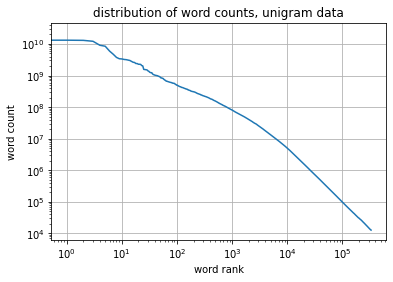

In [134]:
import matplotlib.pyplot as plt

plt.plot(list(freq_df['count']))
plt.xscale('log')
plt.yscale('log')
plt.grid('on')
plt.xlabel('word rank')
plt.ylabel('word count')
plt.title('distribution of word counts, unigram data')
plt.show()

# Frequency of vocabulary words

How does it compare to unigram_freq?

In [135]:
vocabulary_df = pd.DataFrame([[w.lower(), i] for i, w in enumerate(english_words_set)],
                          columns=['word', 'position']).set_index('word')
print(len(vocabulary_df.index))
vocabulary_df.head()

25487


,position
word,
hinman,0
pickman,1
julia,2
mascara,3
femoral,4


In [136]:
vocab_freq_df = freq_df.join(vocabulary_df, on='word', how='right')
print('rows', len(vocab_freq_df.index))
print('null counts', vocab_freq_df['count'].isnull().sum())
vocab_freq_df.head()

rows 25487
null counts 1553


,word,count,position
hinman,hinman,135110.0,0
pickman,pickman,23710.0,1
julia,julia,7556335.0,2
mascara,mascara,842185.0,3
femoral,femoral,627670.0,4


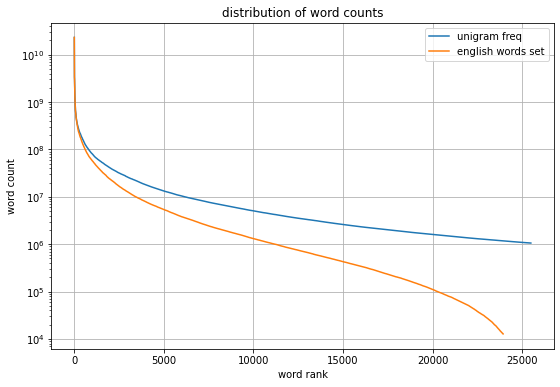

In [137]:
unigram_freq = list(freq_df['count'][:len(vocab_freq_df.index)])
vocab_freq = list(vocab_freq_df.sort_values('count', ascending=False)['count'])

plt.figure(figsize=(9,6))
plt.plot(unigram_freq)
plt.plot(vocab_freq)
#plt.xscale('log')
plt.yscale('log')
plt.grid('on')
plt.xlabel('word rank')
plt.ylabel('word count')
plt.title('distribution of word counts')
plt.legend(['unigram freq','english words set'])
plt.show()

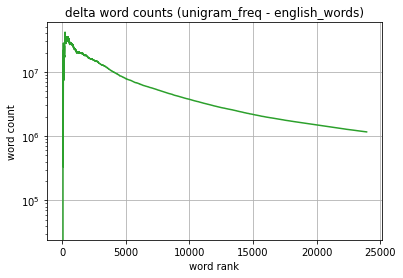

In [138]:
plt.plot([a - b for a, b in zip(unigram_freq, vocab_freq)], c='tab:green')
plt.yscale('log')
plt.grid('on')
plt.xlabel('word rank')
plt.ylabel('word count')
plt.title('delta word counts (unigram_freq - english_words)')
plt.show()

The words in unigram_freg are much more common (according to unigram_freq) than english_words. This is expected given unigram_freq is ordered descending, but we can see the magnitude.

# Comparing word sets

Are the words we'd lose from vocab more or less likely guesses than the words we'd gain from unigram_freq?

In [139]:
unigram_set = set(freq_df.index)
vocab_set = set(vocabulary_df.index)

in_both = unigram_set.intersection(vocab_set)
in_vocab_only = vocab_set.difference(unigram_set)
len(in_both), len(in_vocab_only)

(23927, 1553)

In [140]:
import random

random.sample(list(in_vocab_only), 20)

['freeload',
 'neuroanatomic',
 'piggish',
 'effloresce',
 'superlunary',
 'betoken',
 'extoller',
 "can't",
 'schizomycetes',
 'uniplex',
 'connubial',
 'incombustible',
 'strabismic',
 'doltish',
 'mudsling',
 'ulcerate',
 'gyrocompass',
 'prussic',
 'nutcrack',
 "s's"]

In [142]:
random.sample(list(freq_df.index[len(in_both):len(vocabulary_df.index)]), 20)

['mcmaster',
 'graphically',
 'harmonica',
 'coz',
 'appointing',
 'sligo',
 'irresponsible',
 'gaia',
 'solarium',
 'cheesy',
 'fishers',
 'malachi',
 'attaining',
 'descend',
 'noch',
 'rocked',
 'hsa',
 'gtp',
 'consciously',
 'mikhail']

The samples of words in_vocab_only typically contain 1/3-1/2 the recognisable words as the corresponding index from unigram_freq (according to me)